Watermark embedded successfully.


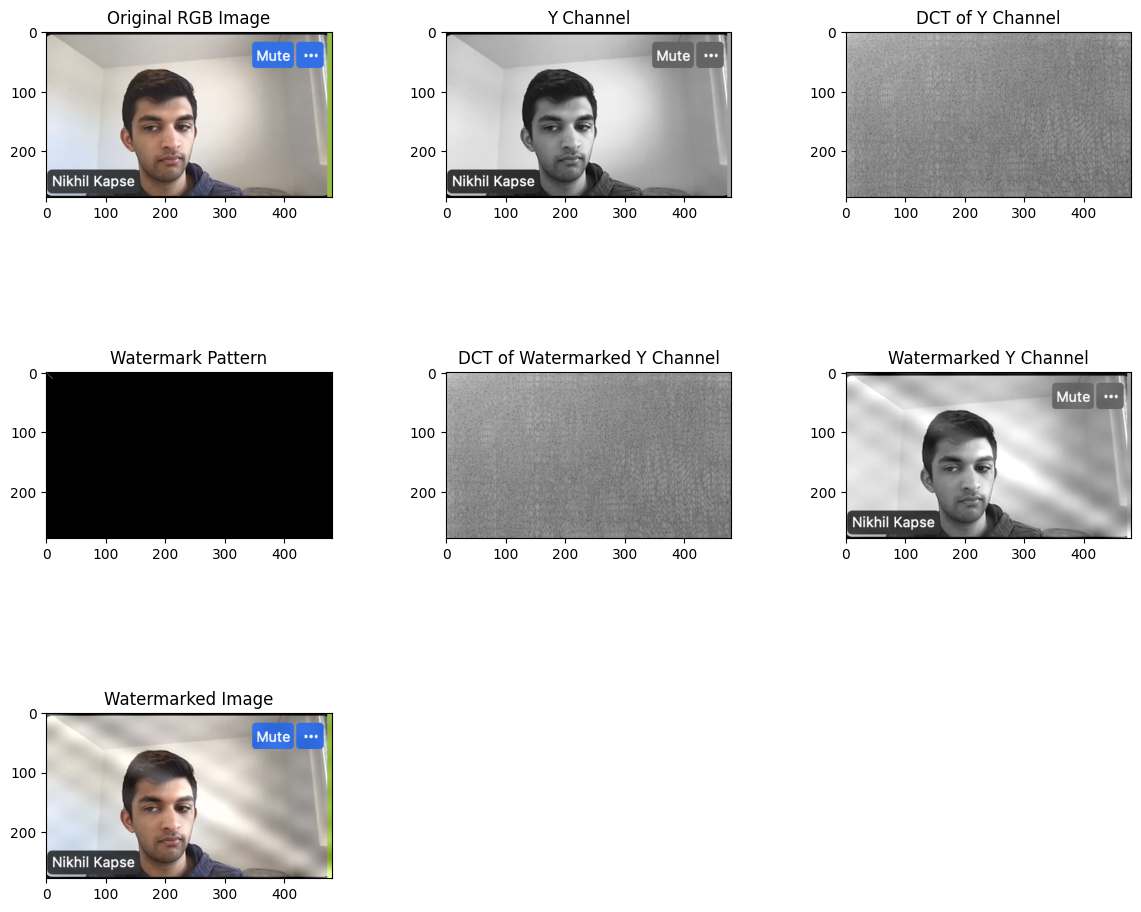

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def embed_watermark(image_path, watermark_str, alpha=0.05):
    # Load the image and convert to YCbCr
    img = cv2.imread(image_path)
    ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cb, cr = cv2.split(ycbcr_img)

    # Plotting setup
    plt.figure(figsize=(14, 12))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    # Original image and Y channel
    plt.subplot(3, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original RGB Image')
    plt.subplot(3, 3, 2), plt.imshow(y, 'gray'), plt.title('Y Channel')

    # DCT of Y channel
    y_float = np.float32(y) / 255.0
    dct_y = cv2.dct(y_float)
    plt.subplot(3, 3, 3), plt.imshow(np.log(abs(dct_y)), 'gray'), plt.title('DCT of Y Channel')

    # Watermark pattern
    watermark = np.zeros(y.shape, dtype=np.float32)
    for i, char in enumerate(watermark_str):
        watermark[i % watermark.shape[0], i % watermark.shape[1]] = alpha * ord(char)
    plt.subplot(3, 3, 4), plt.imshow(watermark, 'gray'), plt.title('Watermark Pattern')

    # Embed the watermark and show DCT of watermarked Y channel
    dct_y_marked = dct_y + watermark
    plt.subplot(3, 3, 5), plt.imshow(np.log(abs(dct_y_marked)), 'gray'), plt.title('DCT of Watermarked Y Channel')

    # Inverse DCT to get the watermarked Y channel and merge with original Cb and Cr channels
    y_marked = cv2.idct(dct_y_marked) * 255
    y_marked_uint8 = np.clip(y_marked, 0, 255).astype(np.uint8)
    plt.subplot(3, 3, 6), plt.imshow(y_marked_uint8, 'gray'), plt.title('Watermarked Y Channel')

    # Final watermarked image
    watermarked_img = cv2.merge([y_marked_uint8, cb, cr])
    watermarked_img_bgr = cv2.cvtColor(watermarked_img, cv2.COLOR_YCrCb2BGR)
    plt.subplot(3, 3, 7), plt.imshow(cv2.cvtColor(watermarked_img_bgr, cv2.COLOR_BGR2RGB)), plt.title('Watermarked Image')

    # Save and display
    cv2.imwrite('watermarked_image.jpg', watermarked_img_bgr)
    print("Watermark embedded successfully.")
    plt.show()

embed_watermark('nikhil.png', 'CS-413@EPFL', 0.1)


<ipython-input-77-6d129eda5144>:29: RuntimeWarning: divide by zero encountered in log
  plt.subplot(2, 3, 4), plt.imshow(np.log(abs(dct_watermarked_areas)), 'gray'), plt.title('DCT Regions Expected for Watermark')


Average difference in watermark areas: 24.563221


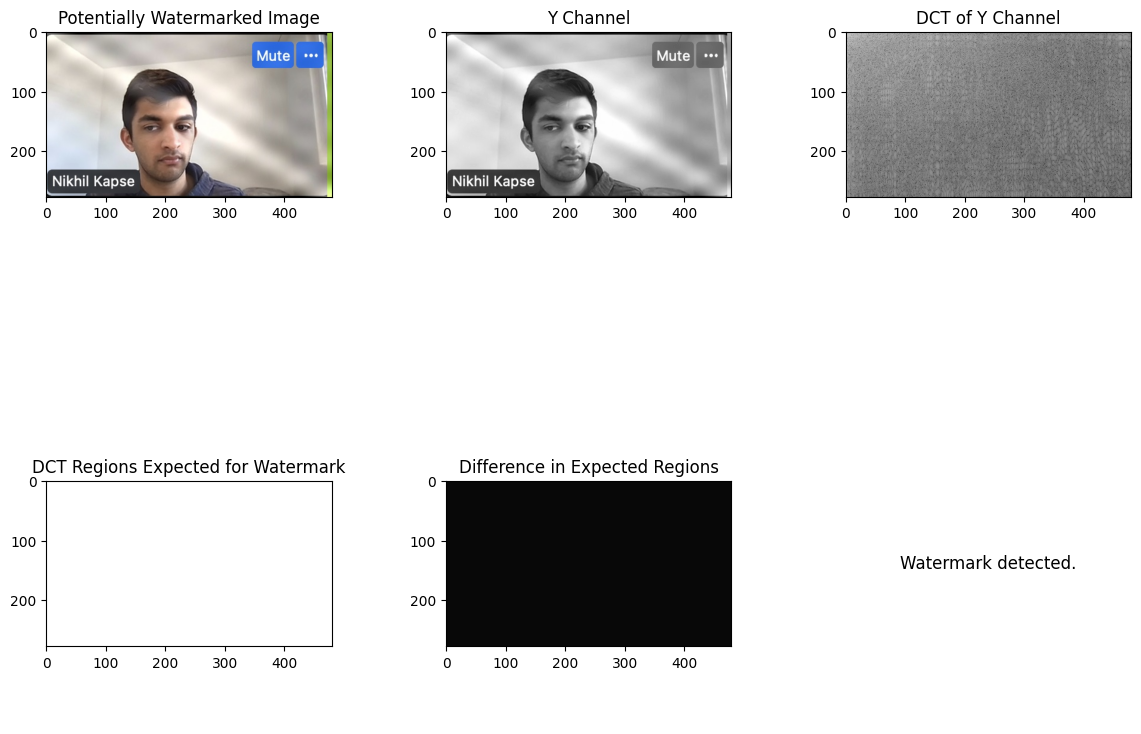

Average difference in watermark areas: 26.881989


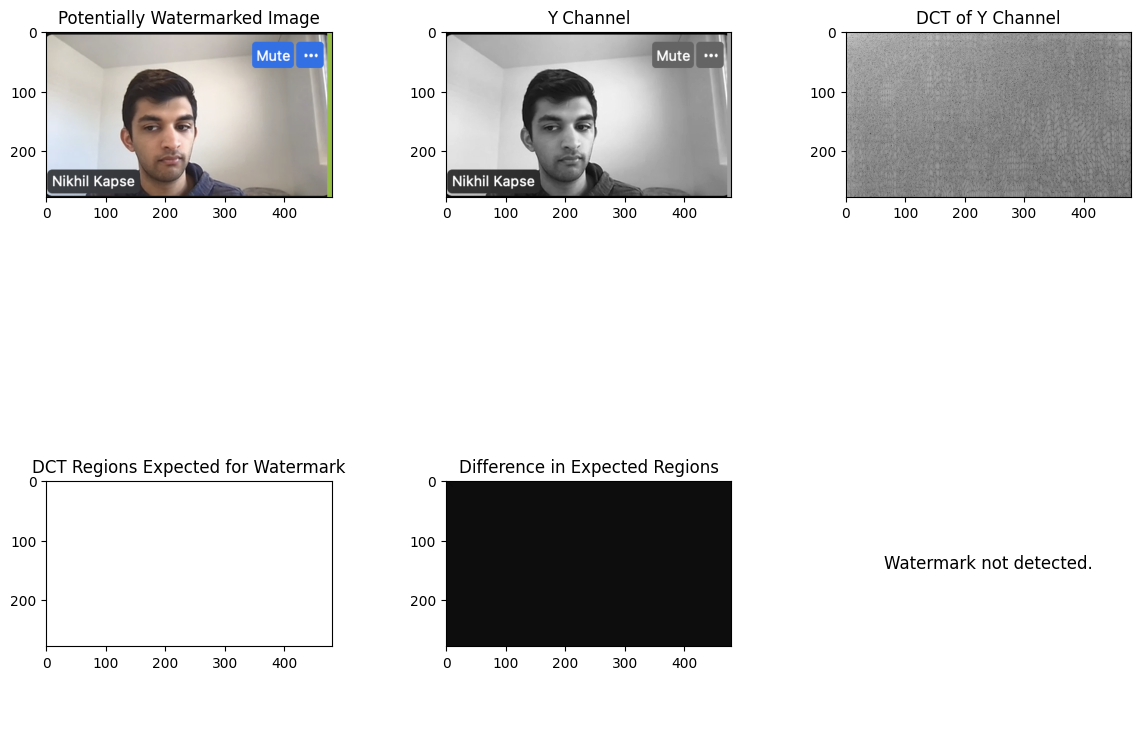

In [ ]:
def detect_watermark(image_path, watermark_str, alpha=0.05, threshold=0.02):
    # Load the potentially watermarked image and convert to YCbCr
    img = cv2.imread(image_path)
    ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, _, _ = cv2.split(ycbcr_img)

    # Plotting setup
    plt.figure(figsize=(14, 10))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    # Display potentially watermarked image and its Y channel
    plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Potentially Watermarked Image')
    plt.subplot(2, 3, 2), plt.imshow(y, 'gray'), plt.title('Y Channel')

    # DCT of the Y channel of potentially watermarked image
    y_float = np.float32(y) / 255.0
    dct_y = cv2.dct(y_float)
    plt.subplot(2, 3, 3), plt.imshow(np.log(abs(dct_y)), 'gray'), plt.title('DCT of Y Channel')

    # Prepare the watermark pattern based on the same method used in embedding
    watermark = np.zeros(y.shape, dtype=np.float32)
    for i, char in enumerate(watermark_str):
        watermark[i % watermark.shape[0], i % watermark.shape[1]] = alpha * ord(char)

    # Compare expected watermark area in DCT
    dct_watermarked_areas = np.zeros_like(dct_y)
    dct_watermarked_areas[watermark > 0] = dct_y[watermark > 0]  # Extract watermarked areas

    plt.subplot(2, 3, 4), plt.imshow(np.log(abs(dct_watermarked_areas)), 'gray'), plt.title('DCT Regions Expected for Watermark')

    # Calculate the difference based on where we expect the watermark
    difference = dct_watermarked_areas - watermark
    plt.subplot(2, 3, 5), plt.imshow(difference, 'gray'), plt.title('Difference in Expected Regions')

    # Compute the average absolute difference where the watermark was expected
    avg_diff = np.mean(np.abs(difference[watermark > 0]))
    print("Average difference in watermark areas:", avg_diff)

    # Detection conclusion
    detection_result = "Watermark detected." if avg_diff < threshold else "Watermark not detected."
    plt.subplot(2, 3, 6), plt.text(0.5, 0.5, detection_result, ha='center', va='center', size=12), plt.axis('off')

    plt.show()


detect_watermark('watermarked_image.jpg', 'CS-413@EPFL', 0.1, 25)
detect_watermark('nikhil.png', 'CS-413@EPFL', 0.1, 25)
